In [15]:
import networkx as nx
from kuramoto import Kuramoto, plot_phase_coherence, plot_activity, plot_heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=2.)

## Half Synchronization Test

### 1) Complete Graph

In [17]:
nxg = nx.complete_graph(10)
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(nxg.nodes()))
natfreqs

array([2.13069669, 2.13069669, 2.13069669, 2.13069669, 2.13069669,
       2.13069669, 2.13069669, 2.13069669, 2.13069669, 2.13069669])

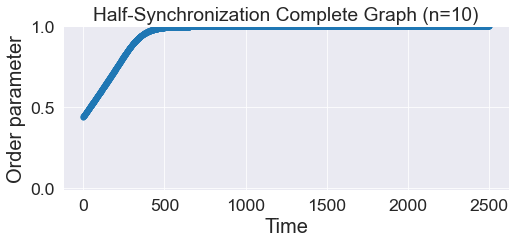

In [18]:
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=0.75, dt=0.01, T=25, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Complete Graph (n=10)');

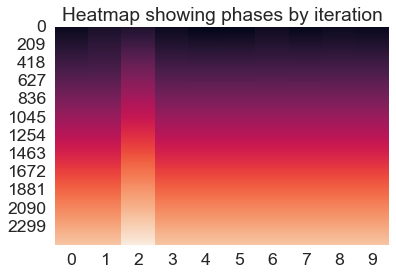

In [19]:
plot_heatmap(sim);

In [20]:
Kuramoto.concentrated

True

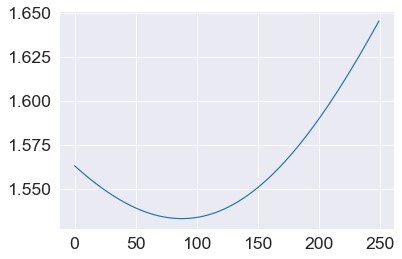

In [44]:
pd.DataFrame(sim.T[:250,:]).std(axis=1).plot();

### 2)  [Karate Club Graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)

In [45]:
nxg = nx.karate_club_graph()
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(nxg.nodes()))

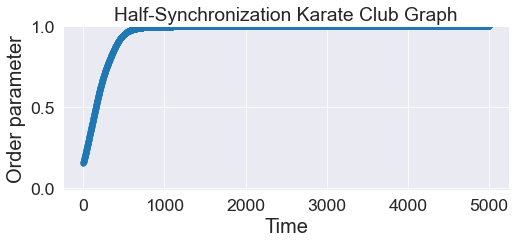

In [46]:
adj_mat = nx.to_numpy_array(nxg)
model = Kuramoto(coupling=0.5, dt=0.01, T=50, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Karate Club Graph');

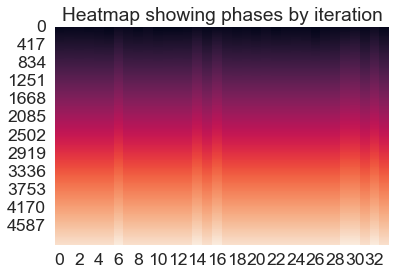

In [47]:
plot_heatmap(sim);

In [48]:
Kuramoto.concentrated

True

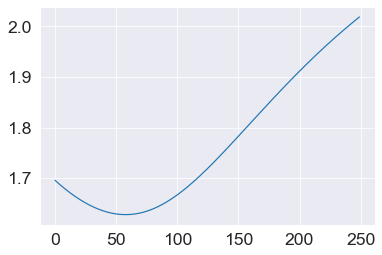

In [49]:
pd.DataFrame(sim.T[:250,:]).std(axis=1).plot();

### 3) Uniformly Random Tree

In [50]:
tree = nx.random_tree(n=25)
natfreqs = np.repeat(2* np.pi * np.random.random(1), len(tree.nodes()))
print(nx.forest_str(tree, sources=[0]))

╙── 0
    └── 17
        ├── 20
        │   └── 18
        │       └── 12
        └── 21
            └── 16
                ├── 1
                └── 2
                    ├── 5
                    │   └── 11
                    └── 19
                        └── 10
                            ├── 3
                            ├── 15
                            │   └── 6
                            │       ├── 7
                            │       └── 22
                            └── 14
                                ├── 4
                                └── 8
                                    ├── 9
                                    └── 13
                                        └── 23
                                            └── 24


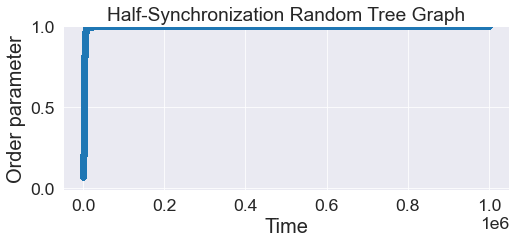

In [51]:
adj_mat = nx.to_numpy_array(tree)
model = Kuramoto(coupling=0.5, dt=0.01, T=10000, natfreqs = natfreqs)
sim = model.run(adj_mat)

plt = plot_phase_coherence(sim)
plt.set_title('Half-Synchronization Random Tree Graph');

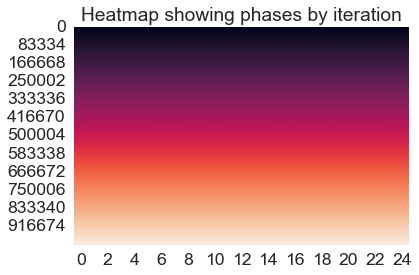

In [52]:
plot_heatmap(sim);

In [53]:
Kuramoto.concentrated

True

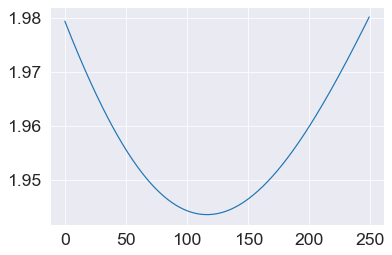

In [54]:
pd.DataFrame(sim.T[:250,:]).std(axis=1).plot();